# KNN Classification

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
y = df['Survived']
X = df.drop('Survived',axis = 1)

In [4]:
#scaling data using min max scaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X = pd.DataFrame(X_scaled,columns = X.columns)

In [7]:
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- All the features are ranging btw 0 to 1

In [8]:
#traintestsplit
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56,stratify = y)

- Stratify will male sure that distribution of target class in both training and testing is equal.

## Implementing KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)  #we have used default value of 5, wec an use elbow method to decide best K
knn.fit(X_train,y_train)


#predict
y_pred = knn.predict(X_test)

#metrics
print(f1_score(y_pred,y_test))

0.6785714285714285


- F1 score is 67.8%

## Elbow for classifier

In [47]:
def Elbow(k):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in k:
        #Instance of KNN
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = knn.predict(X_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [48]:
#define K range
k = range(6,20,2)

In [49]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

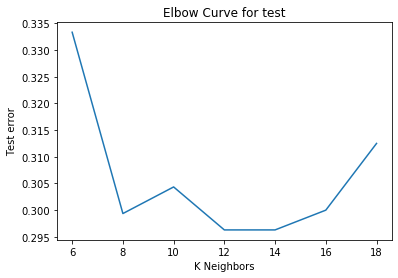

In [50]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [51]:
#now again making KNN model using K=12 as we can see from the above graph
knn = KNeighborsClassifier(n_neighbors = 12)  #we have used default value of 5, wec an use elbow method to decide best K
knn.fit(X_train,y_train)


#predict
y_pred = knn.predict(X_test)

#metrics
print(f1_score(y_pred,y_test))


0.7037037037037037


- We can see that F1 score increased from 67% to 70%.

# KNN Regression

## Importing the data

In [52]:
#This is a cleaned data
df = pd.read_csv('train_cleaned.csv')
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [53]:
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales',axis = 1)

In [54]:
X.shape,y.shape

((8523, 45), (8523,))

## Scaling data using Min max Scaler

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X = pd.DataFrame(X_scaled)

## Splitting

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56 )

## Implementing Knn regressor

In [60]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error as mse

In [62]:
# Creating instance of KNN
reg = KNeighborsRegressor(n_neighbors = 5)

# Fitting the model
reg.fit(X_train,y_train)

# Predicting over the Train Set and calculating MSE
y_pred = reg.predict(X_test)
k = mse(y_pred,y_test)
print('Test MSE    ', k )

Test MSE     1714854.6015010108


## Elbow for Regressor

In [75]:
def Elbow(k):
    #initiating empty list
    test_mse = []
   
    #training model for evey value of K
    for i in k:
        #instance of k
        reg = KNeighborsRegressor(n_neighbors = i)
        reg.fit(X_train,y_train)
        #prediction
        temp = reg.predict(X_test)
        temp = mse(temp,y_test)
        test_mse.append(temp)
       

    return(test_mse)

In [76]:
#Defining K range
k = range(1,40)

In [77]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

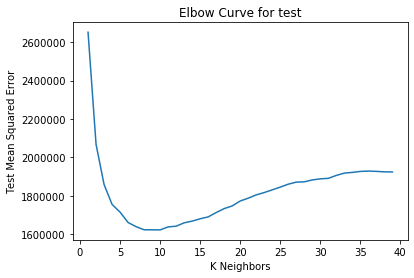

In [78]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [81]:
#now again making KNN model using K=12 as we can see from the above graph

# Creating instance of KNN
reg = KNeighborsRegressor(n_neighbors = 9)

# Fitting the model
reg.fit(X_train,y_train)

# Predicting over the Train Set and calculating MSE
y_pred = reg.predict(X_test)
k = mse(y_pred,y_test)
print('Test MSE    ', k )

Test MSE     1622957.615752187


- We can see that mse reduced from the above model.

Disadvantages of KNN
- iF YOU HAVE NOT SCALED YOUR DATA ,KNN WILL NOT WORK WELL